In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

C:\Users\vella\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [9]:
#Reading data from CSV file
matches=pd.read_csv(r"C:\Users\vella\Downloads\IPL_Matches_2008_2022.csv")

In [12]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 942 entries, 0 to 945
Data columns (total 20 columns):
ID                 942 non-null int64
City               891 non-null object
Date               942 non-null object
Season             942 non-null object
MatchNumber        942 non-null object
Team1              942 non-null object
Team2              942 non-null object
Venue              942 non-null object
TossWinner         942 non-null object
TossDecision       942 non-null object
SuperOver          942 non-null object
WinningTeam        942 non-null object
WonBy              942 non-null object
Margin             928 non-null float64
method             19 non-null object
Player_of_Match    942 non-null object
Team1Players       942 non-null object
Team2Players       942 non-null object
Umpire1            942 non-null object
Umpire2            942 non-null object
dtypes: float64(1), int64(1), object(18)
memory usage: 154.5+ KB


In [11]:
#Removing records having null values in "winner" column
matches=matches[matches["WinningTeam"].notna()]
matches

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1254117,Dubai,15-10-2021,2021,Final,Chennai Super Kings,Kolkata Knight Riders,Dubai International Cricket Stadium,Kolkata Knight Riders,field,N,Chennai Super Kings,Runs,27.0,NaN,F du Plessis,"['RD Gaikwad', 'F du Plessis', 'RV Uthappa', '...","['Shubman Gill', 'VR Iyer', 'N Rana', 'SP Nari...",Nitin Menon,RK Illingworth
1,1254116,Sharjah,13-10-2021,2021,Qualifier 2,Delhi Capitals,Kolkata Knight Riders,Sharjah Cricket Stadium,Kolkata Knight Riders,field,N,Kolkata Knight Riders,Wickets,3.0,NaN,VR Iyer,"['PP Shaw', 'S Dhawan', 'MP Stoinis', 'SS Iyer...","['Shubman Gill', 'VR Iyer', 'N Rana', 'RA Trip...",KN Ananthapadmanabhan,MA Gough
2,1254115,Sharjah,11-10-2021,2021,Eliminator,Royal Challengers Bangalore,Kolkata Knight Riders,Sharjah Cricket Stadium,Royal Challengers Bangalore,bat,N,Kolkata Knight Riders,Wickets,4.0,NaN,SP Narine,"['D Padikkal', 'V Kohli', 'KS Bharat', 'GJ Max...","['Shubman Gill', 'VR Iyer', 'RA Tripathi', 'N ...",CB Gaffaney,VK Sharma
3,1254114,Dubai,10-10-2021,2021,Qualifier 1,Delhi Capitals,Chennai Super Kings,Dubai International Cricket Stadium,Chennai Super Kings,field,N,Chennai Super Kings,Wickets,4.0,NaN,RD Gaikwad,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'AR Patel',...","['RD Gaikwad', 'F du Plessis', 'RV Uthappa', '...",Nitin Menon,RK Illingworth
4,1254088,Abu Dhabi,08-10-2021,2021,55,Mumbai Indians,Sunrisers Hyderabad,"Zayed Cricket Stadium, Abu Dhabi",Mumbai Indians,bat,N,Mumbai Indians,Runs,42.0,NaN,Ishan Kishan,"['RG Sharma', 'Ishan Kishan', 'HH Pandya', 'KA...","['JJ Roy', 'Abhishek Sharma', 'MK Pandey', 'Mo...",Tapan Sharma,VK Sharma
5,1254101,Dubai,08-10-2021,2021,56,Delhi Capitals,Royal Challengers Bangalore,Dubai International Cricket Stadium,Royal Challengers Bangalore,field,N,Royal Challengers Bangalore,Wickets,7.0,NaN,KS Bharat,"['PP Shaw', 'S Dhawan', 'RR Pant', 'SS Iyer', ...","['V Kohli', 'D Padikkal', 'KS Bharat', 'AB de ...",KN Ananthapadmanabhan,Nitin Menon
6,1254106,Sharjah,07-10-2021,2021,54,Kolkata Knight Riders,Rajasthan Royals,Sharjah Cricket Stadium,Rajasthan Royals,field,N,Kolkata Knight Riders,Runs,86.0,NaN,Shivam Mavi,"['Shubman Gill', 'VR Iyer', 'N Rana', 'RA Trip...","['YBK Jaiswal', 'LS Livingstone', 'SV Samson',...",MA Gough,HAS Khalid
7,1254094,Dubai,07-10-2021,2021,53,Chennai Super Kings,Punjab Kings,Dubai International Cricket Stadium,Punjab Kings,field,N,Punjab Kings,Wickets,6.0,NaN,KL Rahul,"['RD Gaikwad', 'F du Plessis', 'MM Ali', 'RV U...","['KL Rahul', 'MA Agarwal', 'SN Khan', 'M Shahr...",K Srinivasan,RK Illingworth
8,1254095,Abu Dhabi,06-10-2021,2021,52,Sunrisers Hyderabad,Royal Challengers Bangalore,"Zayed Cricket Stadium, Abu Dhabi",Royal Challengers Bangalore,field,N,Sunrisers Hyderabad,Runs,4.0,NaN,KS Williamson,"['JJ Roy', 'Abhishek Sharma', 'KS Williamson',...","['V Kohli', 'D Padikkal', 'DT Christian', 'KS ...",S Ravi,UV Gandhe
9,1254093,Sharjah,05-10-2021,2021,51,Rajasthan Royals,Mumbai Indians,Sharjah Cricket Stadium,Mumbai Indians,field,N,Mumbai Indians,Wickets,8.0,NaN,NM Coulter-Nile,"['E Lewis', 'YBK Jaiswal', 'SV Samson', 'S Dub...","['RG Sharma', 'Ishan Kishan', 'SA Yadav', 'HH ...",AK Chaudhary,MA Gough


In [ ]:
matches.info()

# """# Visualizations"""

In [16]:
#Toss affecting the win dataframe
toss_win_result = matches.groupby(['TossWinner']).WinningTeam.value_counts().reset_index(name="count")
toss_win_result['result']=np.where(toss_win_result.WinningTeam==toss_win_result.TossWinner,'won','lost')
toss_win_result_df = toss_win_result.groupby(['TossWinner','result'])['count'].sum().reset_index()

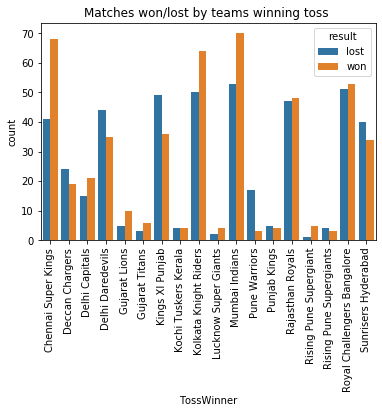

In [17]:
#Visualization
plot = sns.barplot(x="TossWinner", y="count", hue="result", data=toss_win_result_df)
plot.set_title('Matches won/lost by teams winning toss ')
plot.set_xticklabels(toss_win_result_df['TossWinner'].unique(),rotation=90)
plt.show()


In [18]:
#Winning stats of teams bat/field first by venues 
venue_toss_decision_result=matches[["TossWinner","TossDecision","WinningTeam","City"]]
venue_toss_decision_result["decision"]=np.where((venue_toss_decision_result.TossWinner == venue_toss_decision_result.WinningTeam) & (venue_toss_decision_result.TossDecision=="field"),"field_won","bat_won")
venue_result=venue_toss_decision_result.groupby(["City"]).decision.value_counts().reset_index(name="count")

C:\Users\vella\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


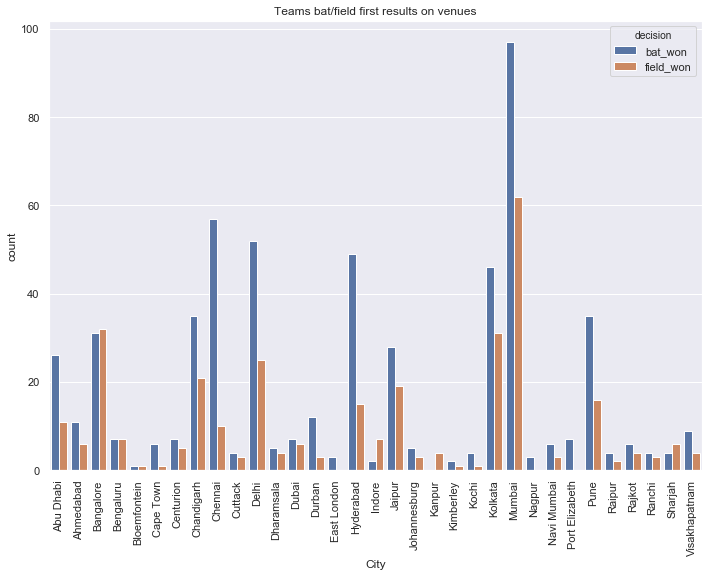

In [20]:
#Visualization
sns.set(rc={'figure.figsize':(11.7,8.27)})
plot = sns.barplot(x="City", y="count", hue="decision", data=venue_result)
plot.set_title('Teams bat/field first results on venues')
plot.set_xticklabels(venue_result['City'].unique(),rotation=90)
plt.show()

Text(0.5, 1.0, 'No of matches won by different teams')

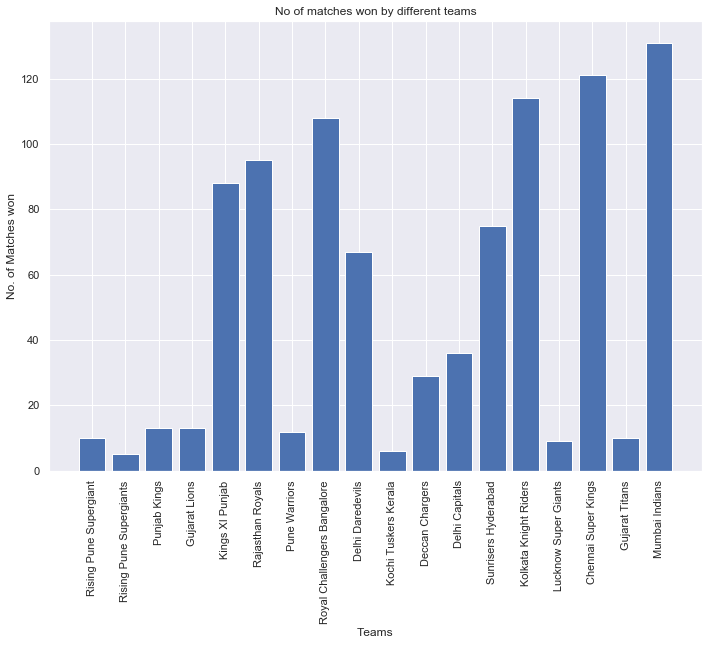

In [21]:
teams = list(set(matches.loc[:,'Team1']))
matches_won = [len(matches.loc[matches['WinningTeam'] == i]) for i in teams]
plt.bar(np.arange(len(teams)), matches_won)
plt.xticks(np.arange(len(teams)), teams, rotation='vertical')
plt.ylabel('No. of Matches won')
plt.xlabel('Teams')
plt.title('No of matches won by different teams')

In [22]:
"""# Data Preprocessing & Prediction"""

#Replacing the Rising Pune Supergiant with Rising Pune Supergiants
matches["Team2"]=matches["Team2"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
matches["Team1"]=matches["Team1"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
matches["WinningTeam"]=matches["WinningTeam"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
matches["TossWinner"]=matches["TossWinner"].replace("Rising Pune Supergiant","Rising Pune Supergiants")

In [26]:
#encoder
encoder= LabelEncoder()
matches["Team1"]=encoder.fit_transform(matches["Team1"])
matches["Team2"]=encoder.fit_transform(matches["Team2"])
matches["WinningTeam"]=encoder.fit_transform(matches["WinningTeam"].astype(str))
matches["TossWinner"]=encoder.fit_transform(matches["TossWinner"])
matches["City"]=encoder.fit_transform(matches["City"].astype(str))

In [29]:
#outcome variable as a probability of team1 winning
matches.loc[matches["WinningTeam"]==matches["Team1"],"team1_win"]=1
matches.loc[matches["WinningTeam"]!=matches["Team1"],"team1_win"]=0

matches.loc[matches["TossWinner"]==matches["Team1"],"team1_toss_win"]=1
matches.loc[matches["TossWinner"]!=matches["Team1"],"team1_toss_win"]=0

matches["team1_bat"]=0
matches.loc[(matches["team1_toss_win"]==1) & (matches["TossDecision"]=="bat"),"team1_bat"]=1

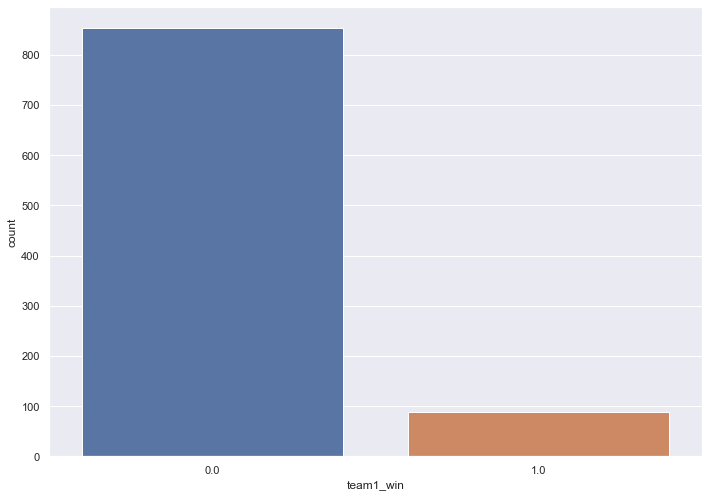

In [30]:
#Checking for the distribution of the dataset
sns.countplot(x="team1_win",data=matches)
plt.show()

In [31]:
prediction_df=matches[["Team1","Team2","team1_toss_win","team1_bat","team1_win","City"]]

In [32]:
prediction_df

,Team1,Team2,team1_toss_win,team1_bat,team1_win,City
0,0,8,0.0,0,1.0,12
1,2,8,0.0,0,0.0,31
2,15,8,1.0,1,0.0,31
3,2,0,0.0,0,0.0,12
4,10,16,1.0,1,0.0,0
5,2,15,0.0,0,0.0,12
6,8,13,0.0,0,0.0,31
7,0,12,0.0,0,0.0,12
8,16,15,0.0,0,0.0,0
9,13,10,0.0,0,0.0,31


In [33]:
#dropping higly correlated features
correlated_features = set()
correlation_matrix = prediction_df.drop('team1_win', axis=1).corr()
correlation_matrix

,Team1,Team2,team1_toss_win,team1_bat,City
Team1,1.000000,-0.111011,-0.054132,-0.094584,0.013114
Team2,-0.111011,1.000000,0.021305,0.025629,0.012250
team1_toss_win,-0.054132,0.021305,1.000000,0.660421,-0.005322
team1_bat,-0.094584,0.025629,0.660421,1.000000,0.000489
City,0.013114,0.012250,-0.005322,0.000489,1.000000


In [36]:
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

prediction_df.drop(columns=correlated_features)

,Team1,Team2,team1_toss_win,team1_bat,team1_win,City
0,0,8,0.0,0,1.0,12
1,2,8,0.0,0,0.0,31
2,15,8,1.0,1,0.0,31
3,2,0,0.0,0,0.0,12
4,10,16,1.0,1,0.0,0
5,2,15,0.0,0,0.0,12
6,8,13,0.0,0,0.0,31
7,0,12,0.0,0,0.0,12
8,16,15,0.0,0,0.0,0
9,13,10,0.0,0,0.0,31


In [37]:
#feature selection
X = prediction_df.drop('team1_win', axis=1)
target = prediction_df['team1_win']
target=target.astype(int)

In [38]:
logReg=LogisticRegression(solver='lbfgs')
rfe = RFE(logReg, 20)
rfe = rfe.fit(X, target.values.ravel())
#Checking for the features of they are important
print(rfe.support_)

[ True  True  True  True  True]


In [39]:
#Splitting the data into training and testing data and scaling it
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [40]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logreg.score(X_test, y_test)))

[[169   1]
 [ 17   2]]
             precision    recall  f1-score   support

          0       0.91      0.99      0.95       170
          1       0.67      0.11      0.18        19

avg / total       0.88      0.90      0.87       189

Accuracy of logistic regression classifier on test set: 0.9048


In [41]:
#SVM
svm=SVC()
svm.fit(X_train,y_train)
svm.score(X_test,y_test)
y_pred = svm.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy of SVM classifier on test set: {:.4f}'.format(svm.score(X_test, y_test)))

[[170   0]
 [ 18   1]]
             precision    recall  f1-score   support

          0       0.90      1.00      0.95       170
          1       1.00      0.05      0.10        19

avg / total       0.91      0.90      0.86       189

Accuracy of SVM classifier on test set: 0.9048


In [42]:
#Decision Tree Classifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree.score(X_test,y_test)
y_pred = dtree.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy of decision tree classifier on test set: {:.4f}'.format(dtree.score(X_test, y_test)))

[[163   7]
 [ 14   5]]
             precision    recall  f1-score   support

          0       0.92      0.96      0.94       170
          1       0.42      0.26      0.32        19

avg / total       0.87      0.89      0.88       189

Accuracy of decision tree classifier on test set: 0.8889


In [43]:
#Random Forest Classifier
randomForest= RandomForestClassifier(n_estimators=100)
randomForest.fit(X_train,y_train)
randomForest.score(X_test,y_test)
y_pred = randomForest.predict(X_test)
print("Confusion matrix\n",confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy of random forest classifier on test set: {:.4f}'.format(randomForest.score(X_test, y_test)))

Confusion matrix
 [[163   7]
 [ 13   6]]
             precision    recall  f1-score   support

          0       0.93      0.96      0.94       170
          1       0.46      0.32      0.37        19

avg / total       0.88      0.89      0.89       189

Accuracy of random forest classifier on test set: 0.8942
